In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import re

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
path='F:/DMIA_Sport_2019'
test='Xtest.csv'
train='train.csv'
df_train = pd.read_csv(os.path.join(path,train), sep=',')
df_test = pd.read_csv(os.path.join(path,test), sep=',')

In [87]:
df_test.head()

,Id,Password
0,0,ThaisCunha
1,1,697775113
2,2,922a16922a
3,3,andy74
4,4,joemack


In [88]:
df_train.describe()

,Times
count,4.151496e+06
mean,1.922133e+00
std,3.250090e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,5.589300e+04


#### Средняя частота встречания пароля по тренировочной выборке = 1.92

### Процент часто используемых паролей из выборки ко всей выборке

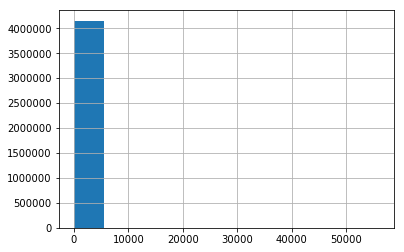

In [89]:
df_train.Times.hist()

In [33]:
pop_frequency=10
print(round(len(df_train[df_train.Times >= pop_frequency ])/len(df_train[df_train.Times < pop_frequency ])*100,3),'%')

1.765 %


In [34]:
#словарь часто встречающихся паролей
dict_passw = {}
for i,row in df_train[df_train.Times >= pop_frequency ].iterrows():
    dict_passw[str(row['Password'])] = row['Times']

In [35]:
dict_passw

{'16121994': 39,
 '01051959': 16,
 '24111990': 64,
 '05011981': 24,
 'spocky': 10,
 'maxx': 113,
 'shavon': 13,
 '26091997': 19,
 '06051992': 43,
 'wahwah': 14,
 'swain': 11,
 'parke': 29,
 '04021999': 23,
 '05031983': 46,
 'pippin': 96,
 'volleyball': 53,
 'beautiful1': 19,
 '09101979': 42,
 'rueben': 14,
 'part': 13,
 'small': 120,
 '131090': 20,
 'Mouse': 10,
 'ZAQ!2wsx': 15,
 '13101982': 60,
 'AZaz09': 10,
 '02101980': 66,
 'spit': 17,
 'Superman': 111,
 '08101965': 13,
 '23011995': 38,
 '30071998': 10,
 '190278': 12,
 '5869': 10,
 'tslabels': 10,
 'blue4': 10,
 'Police1': 10,
 'archie1': 16,
 'donkey1': 30,
 'course': 20,
 'demeter': 23,
 '20121960': 13,
 '13071983': 54,
 'ocean11': 25,
 'dang': 120,
 'italia1': 12,
 '08031961': 12,
 'farfar': 14,
 '04101976': 24,
 'liljoe': 15,
 'dima13': 11,
 '25071981': 46,
 '210876': 17,
 '03041995': 32,
 'jay123': 29,
 '29121978': 35,
 'STUPID': 16,
 '14071989': 50,
 'folders': 12,
 'allday': 56,
 'redfish1': 11,
 'lasse': 14,
 '29071977': 28

In [36]:
#проверим наличие часто встречающихся паролей в тестовой выборке
for passwd in df_test.Password:
    #print(passwd)
    if passwd in dict_passw.keys():
        print(passwd)

In [37]:
#удалим часто встречающиеся пароли из тренировочной выборки
df_train = df_train[df_train.Times < 10 ]

### Генерация признаков

In [73]:
def is_year(row):
    if str(row['Password']).isdigit() and (2025 >= int(row['Password']) >= 1900):
        return 1
    else:
        return 0
    
def is_palindrome(row):
    if str(row['Password']) == str(row['Password'])[::-1]:
        return 1
    else:
        return 0

In [39]:
def is_digit(row):
    #print(row)
    if str(row['Password']).isdigit():
        return 1
    else:
        return 0 

In [40]:
def count_digits(row):
    return len(re.sub("[^0-9]", "", str(row['Password'])))

In [41]:
def count_upper_case(row):
    return len(re.sub("[^A-Z]", "", str(row['Password'])))

In [42]:
def count_lower_case(row):
    return len(re.sub("[^a-z]", "", str(row['Password'])))

In [43]:
def entropy(row):
    labels = str(row['Password'])
    prob_dict = {x:labels.count(x)/len(labels) for x in labels}
    probs = np.array(list(prob_dict.values()))
    return - probs.dot(np.log2(probs))

In [90]:
df_train['is_digit'] = df_train.apply(lambda row: is_digit(row), axis=1)

In [91]:
df_train['len'] = df_train.apply(lambda row: len(str(row['Password'])), axis=1)

In [92]:
df_train['count_digits'] = df_train.apply(lambda row: count_digits(row), axis=1)

In [93]:
df_train['count_upper_case'] = df_train.apply(lambda row: count_upper_case(row), axis=1)

In [94]:
df_train['count_lower_case'] = df_train.apply(lambda row: count_lower_case(row), axis=1)

In [95]:
df_train['entropy'] = df_train.apply(lambda row: entropy(row), axis=1)

In [96]:
df_train['is_year'] = df_train.apply(lambda row: is_year(row), axis=1)

In [97]:
df_train['is_palindrome'] = df_train.apply(lambda row: is_palindrome(row), axis=1)

In [98]:
df_train.tail()

,Password,Times,is_digit,len,count_digits,count_upper_case,count_lower_case,entropy,is_year,is_palindrome
4151491,7503ri,1,0,6,4,0,2,2.584963,0,0
4151492,trou,2,0,4,0,0,4,2.000000,0,0
4151493,300762,7,1,6,6,0,0,2.251629,0,0
4151494,seaurchin007,1,0,12,3,0,9,3.418296,0,0
4151495,65255808,1,1,8,8,0,0,2.155639,0,0


In [106]:
features_list=['is_digit', 'len', 'count_digits', 'count_upper_case', 'count_lower_case', 'is_year', 'is_palindrome']
df_train = df_train[df_train.Times < 10 ]
X = df_train.filter(features_list, axis=1)

In [100]:
#Значения признаков у тестовой выборки
df_test['is_digit'] = df_test.apply(lambda row: is_digit(row), axis=1)
df_test['len'] = df_test.apply(lambda row: len(str(row['Password'])), axis=1)
df_test['count_digits'] = df_test.apply(lambda row: count_digits(row), axis=1)
df_test['count_upper_case'] = df_test.apply(lambda row: count_upper_case(row), axis=1)
df_test['count_lower_case'] = df_test.apply(lambda row: count_lower_case(row), axis=1)
df_test['is_palindrome'] = df_test.apply(lambda row: is_palindrome(row), axis=1)
df_test['is_year'] = df_test.apply(lambda row: is_year(row), axis=1)

In [101]:
X_test = df_test.filter(features_list, axis=1)

In [107]:
y = df_train.Times

In [81]:
def optimal_constant(y):
    return np.exp(np.mean(np.log(np.array(y)+1)))-1

In [103]:
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [108]:
regr = DecisionTreeRegressor(max_depth=5)
regr.fit(X, y)
y_2 = regr_2.predict(X_test)

In [92]:
y_optim_const = optimal_constant(y)

In [84]:
y_2

array([1.10223472, 1.10223472, 1.10223472, ..., 1.22147358, 1.16375773,
       1.29696973])

In [109]:
#y_optim_const = optimal_constant(y) 
#(дало скор 0.39506)
with open(os.path.join(path,'submition_DesisionTree_is_yesy_polindrome.csv'), 'w') as f:
    f.write('Id,Times\n')
    for i in range(0,len(X_test)):
        f.write('{0},{1}\n'.format(i, y_2[i]))

In [109]:
#y_optim_const = optimal_constant(y)
#with open(os.path.join(path,'submition_DesisionTree_filtered_pop_less10times.csv'), 'w') as f:
#    f.write('Id,Times\n')
#    for i in range(0,len(X_test)):
#        f.write('{0},{1}\n'.format(i, y_2[i]))